# Statistical Hypothesis testing
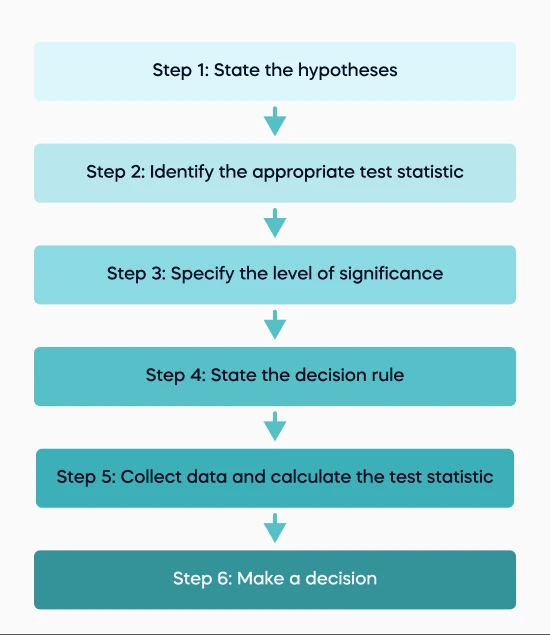

Hypothesis testing is the Sherlock Holmes of statistics – a method to deduce whether the evidence (data) backs up a particular claim (hypothesis). In the world of data science, it’s crucial for decision-making, ensuring that results aren’t just a fluke! Let's dive into how to practically implement hypothesis testing in Python with a structured approach.

🚦 Structured Approach to Hypothesis Testing

A step-by-step approach ensures clarity and accuracy. Here’s the roadmap:

1. State the Hypothesis (Formulating Null and Alternative Hypotheses)

    Null Hypothesis (H₀): The assumption that nothing interesting is happening (status quo).

    Alternative Hypothesis (H₁): The claim we are testing – that something is happening.

    Example: Testing if a new drug reduces blood pressure:

    H₀: The drug has no effect (mean BP = 120)

    H₁: The drug reduces BP (mean BP < 120)

2. Select an Appropriate Test 📏

    The choice of test depends on the data type and hypothesis:

    T-test – comparing means (great for small sample sizes)

    Chi-square test – for categorical data

    ANOVA – comparing means of multiple groups

    Mann-Whitney U Test – non-parametric test for median comparisons

3. Specify the Significance Level (α) 📉

    This is your tolerance for false positives.

    A common choice: α = 0.05 (meaning 5% chance of rejecting H₀ when it's actually true).

4. State the Decision Rule 🔍

    Define critical values or p-value thresholds.

    If the p-value is less than α, reject H₀. Otherwise, fail to reject H₀.

5. Calculate the Test Statistic ✏️

    Use Python to compute the test statistic (e.g., t-score, z-score).

    Compare this value against critical values or interpret the p-value.

6. Make the Decision 🎯

    Reject H₀ or fail to reject H₀ based on your test results.

    🧰 Python Libraries for Hypothesis Testing

Python offers robust libraries for statistical testing. Here's the cream of the crop:

1. SciPy – 🏆 The Gold Standard

    Why popular? Comprehensive, well-documented, and efficient.

    Use case: T-tests, ANOVA, chi-square, and more.



from scipy import stats
t_stat, p_val = stats.ttest_1samp(data, population_mean)

2. Statsmodels – 📈 Regression and Beyond

    Why popular? Extends basic hypothesis testing to advanced statistical modeling.

    Use case: Linear models, ANOVA, t-tests.



import statsmodels.api as sm
sm.stats.ttest_ind(data1, data2)

3. Pingouin – 🐧 Simplicity Meets Power

    Why popular? User-friendly, flexible, and built specifically for hypothesis testing.

    Use case: Parametric and non-parametric tests.



## importing libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [14]:
import seaborn as sns

In [15]:
from scipy.stats import norm

## Estimating Mean Height of Sentinel Island with Confidence Interval 📏🌴

🧭 Problem Definition:

Sentinel Island has a population of 5000, but due to its hostile nature and restrictions, conducting a full census is impossible. However, we have a random sample of 500 individuals whose height data shows:

Sample Mean (𝑥̄): 160 cm

Sample Standard Deviation (s): 16 cm

Our goal is to estimate the mean height of the entire population with a 95% confidence interval (CI).

🔍 What is Confidence Interval (CI)?

A confidence interval gives a range of values, derived from a dataset, that is likely to contain the true population mean. A 95% CI means we are 95% confident that the population mean lies within this interval.

Key Concepts:

Sample Mean (𝑥̄): Average of sample data (160 cm in this case).

Standard Error (SE): Measures how much the sample mean deviates from the population mean.

Confidence Level: Probability that the calculated interval contains the population mean (95%).

Margin of Error (ME): Extent of error allowed, determined by the z-score.

Z-Score: Number of standard deviations corresponding to the desired confidence level (1.96 for 95%).

In [16]:
# Data and Constants
x_ = 160  # Sample mean height (cm)
s = 16  # Sample standard deviation (cm)
n = 500  # Number of people in sample
confidence_level = 0.95  # 95% confidence level

In [17]:
# Calculate Standard Error (SE)
standard_error = s / np.sqrt(n)
standard_error

0.7155417527999327

In [18]:
# Calculate Z-score for 95% CI
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

In [19]:
# Calculate Margin of Error (ME)
moe = z_score * standard_error
moe

1.4024360649225305

In [20]:
# Calculate Confidence Interval (CI)
ci_lower = x_ - moe
ci_upper = x_ + moe

In [21]:
# Print Results
print(f"Sample Mean: {x_} cm")
print(f"95% Confidence Interval: ({ci_lower:.2f} cm, {ci_upper:.2f} cm)")


Sample Mean: 160 cm
95% Confidence Interval: (158.60 cm, 161.40 cm)


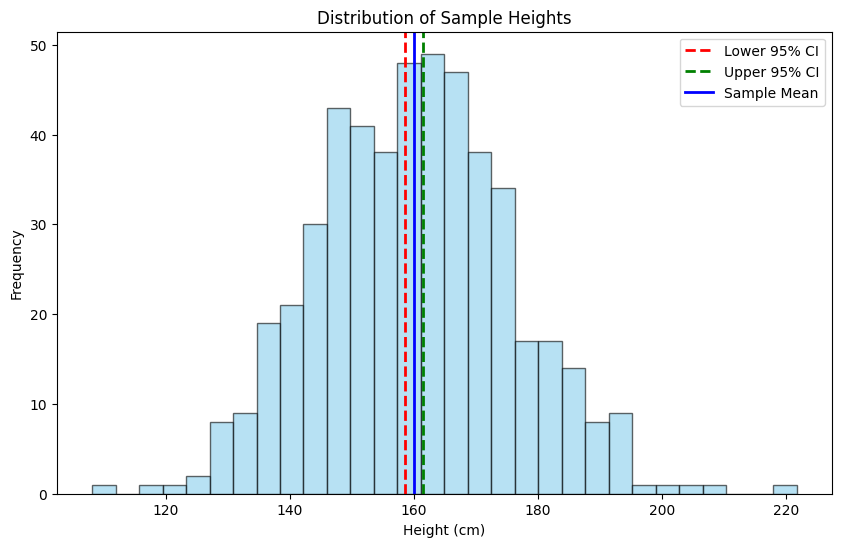

In [22]:
# Visualize Sample Distribution
np.random.seed(42)
sample_heights = np.random.normal(x_, s, n)

plt.figure(figsize=(10, 6))
plt.hist(sample_heights, bins=30, alpha=0.6, color='skyblue', edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2, label='Lower 95% CI')
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label='Upper 95% CI')
plt.axvline(x_, color='blue', linestyle='solid', linewidth=2, label='Sample Mean')
plt.title('Distribution of Sample Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Z-test for single sample

#### 🧭 Problem Definition:

The census of indian population shows that average population height of indians was 162 cm (both male and female) with standard deviation of 3.5 cm. The new survey of 3 crore people shows average of 167 cm is there significant change to claim increased population height.

Goal: Test if the new policy has significantly improved student scores at a 95% confidence level.

### 🔍 Key Concepts and Definitions:

1. Hypothesis Formulation:

Null Hypothesis (H₀): No improvement in student scores (mean = 64%).

Alternative Hypothesis (H₁): Improvement in student scores (mean > 64%).

2. Z-Test:

A z-test is appropriate here due to the large sample size and known population parameters.

3. Confidence Level and Significance Level (α):

Confidence Level: 95%

Significance Level (α): 1 - 0.95 = 0.05

4. Test Statistic (Z-Score):

Measures how many standard deviations the sample mean is from the population mean.

5. Critical Value:

The z-value corresponding to the 95% confidence level is approximately 1.645 for a one-tailed test.

6. Standard Error (SE):

Quantifies the variability in the sample mean relative to the population mean.

7. Type I and Type II Errors:

Type I Error (α): Rejecting H₀ when it is true.

Type II Error (β): Failing to reject H₀ when H₁ is true.

In [23]:
# Data and Constants
mu_ = 162  # Historical mean score
std_dev = 3.5  # Historical standard deviation
x_ = 167  # Post-policy mean score
sample_std_dev = std_dev
n = 3*10**7 # New sample size (8 lacs)
confidence_level = 0.95  # 95% confidence

In [24]:
# Calculate Standard Error (SE)
standard_error = std_dev / np.sqrt(n)

# Calculate Z-score (Test Statistic)
z_score = (x_ - mu_) / std_dev

# Calculate Critical Value for 95% Confidence (One-tailed test)
z_critical = norm.ppf(loc= mu_,scale= std_dev  ,q=confidence_level)

# Calculate P-value
p_value = 1 - stats.norm.cdf(z_score)


In [25]:
(x_ - mu_)/std_dev

1.4285714285714286

In [26]:
dist = norm()

In [27]:
z_critical

167.75698769433015

### Visualization
Python has powerful capabilities which can be used to visualize:
1. Population distributions suggested by both that will become part of hypothesis
2. The value of z-critical on the population
3. Margin of error and sample size
4. Type 2 error and power of test
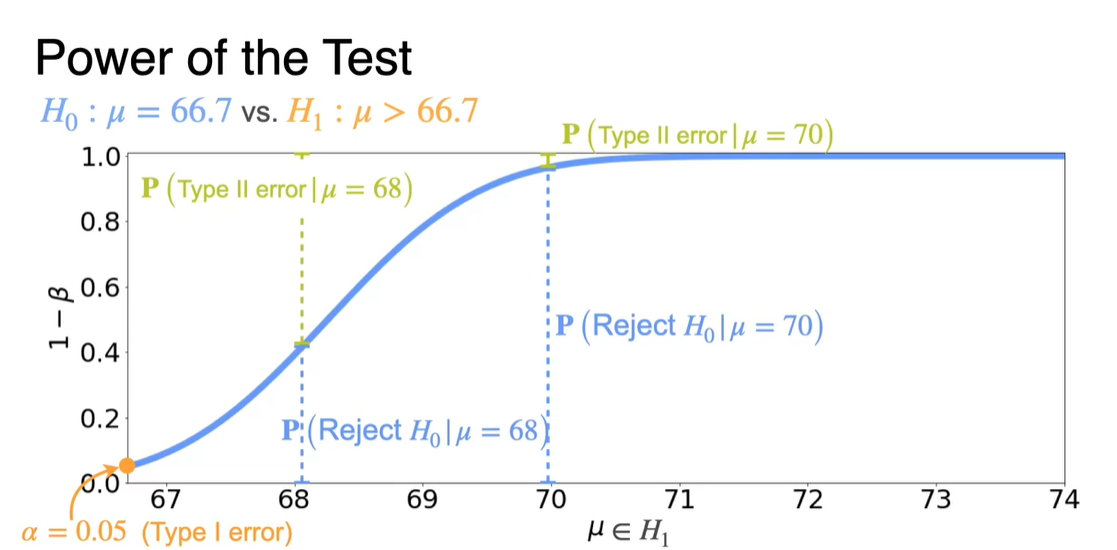

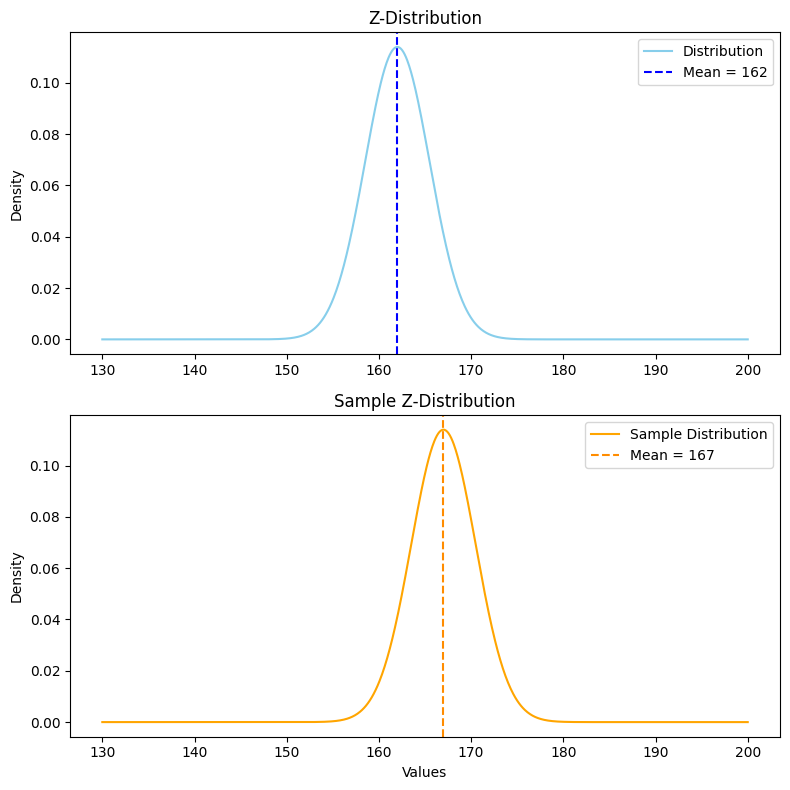

In [28]:
# Visulasing z-score on distribution
fig, ax = plt.subplots(2,1, figsize=(8,8))

# Plot_ distribution
x = np.linspace(130, 200, 1000)
ax[0].plot(x, norm.pdf(x, mu_, std_dev), label= 'Distribution', color='skyblue')
ax[0].axvline(mu_, color='blue', linestyle='dashed', label=f'Mean = {mu_}')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].set_title( 'Z-Distribution')

# Plot sample distribution
ax[1].plot(x, norm.pdf(x, x_, std_dev), label='Sample Distribution', color='orange')
ax[1].axvline(x_, color='darkorange', linestyle='dashed', label=f'Mean = {x_}')
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].set_title('Sample Z-Distribution')
ax[1].set_xlabel('Values')

plt.tight_layout()
plt.show()


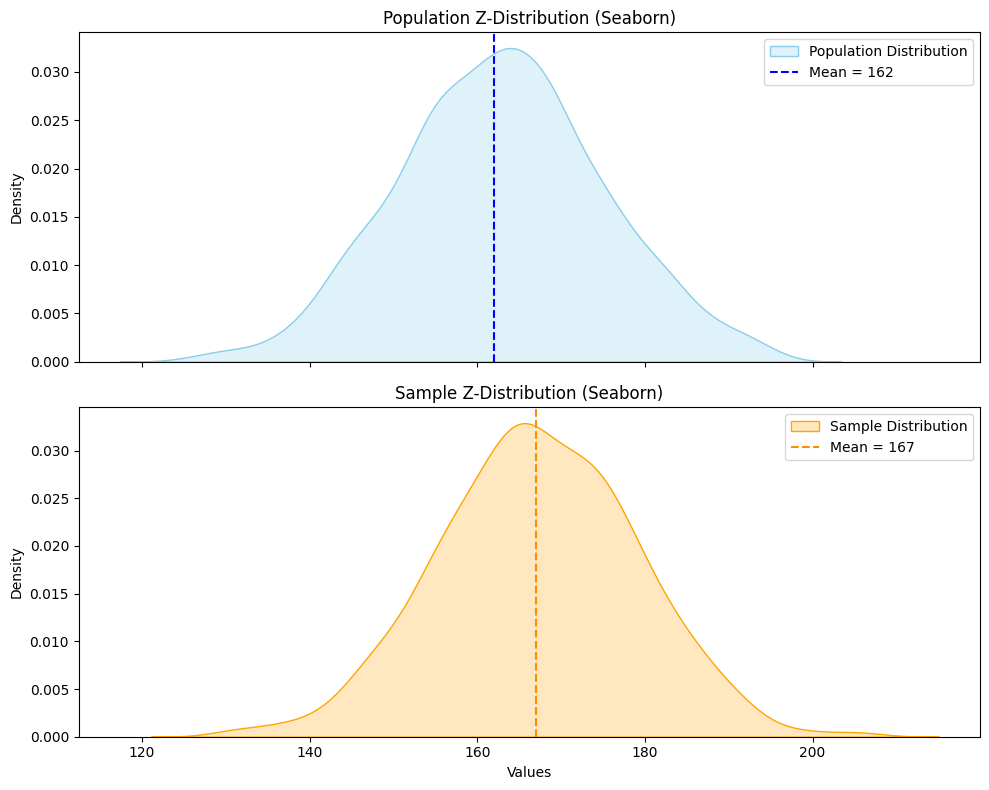

In [29]:
# Seaborn Implementation
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

data_population = np.random.normal(mu_, std_dev**2, 1000)
data_sample = np.random.normal(x_, std_dev**2, 1000)

sns.kdeplot(data_population, ax=ax[0], color='skyblue', fill=True, label='Population Distribution')
ax[0].axvline(mu_, color='blue', linestyle='dashed', label=f'Mean = {mu_}')
ax[0].legend()
ax[0].set_title('Population Z-Distribution (Seaborn)')
ax[0].set_ylabel('Density')

sns.kdeplot(data_sample, ax=ax[1], color='orange', fill=True, label='Sample Distribution')
ax[1].axvline(x_, color='darkorange', linestyle='dashed', label=f'Mean = {x_}')
ax[1].legend()
ax[1].set_title('Sample Z-Distribution (Seaborn)')
ax[1].set_ylabel('Density')
ax[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

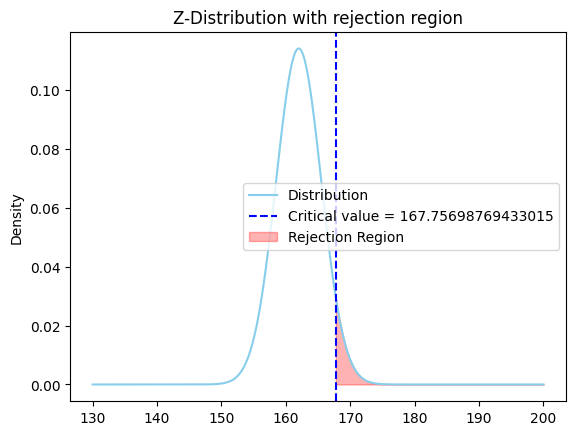

In [30]:
# Visualising critical values which on observation in sampled data shows change in population distribution

plt.plot(x, norm.pdf(x, mu_, std_dev), label= 'Distribution', color='skyblue')
plt.axvline(z_critical, color='blue', linestyle='dashed', label=f'Critical value = {z_critical}')

# Shade the rejection region (right tail)
x_fill = np.linspace(z_critical, x.max(), 500)
plt.fill_between(x_fill, norm.pdf(x_fill, mu_, std_dev), color='red', alpha=0.3, label='Rejection Region')

plt.ylabel('Density')
plt.legend()
plt.title( 'Z-Distribution with rejection region')
plt.show()

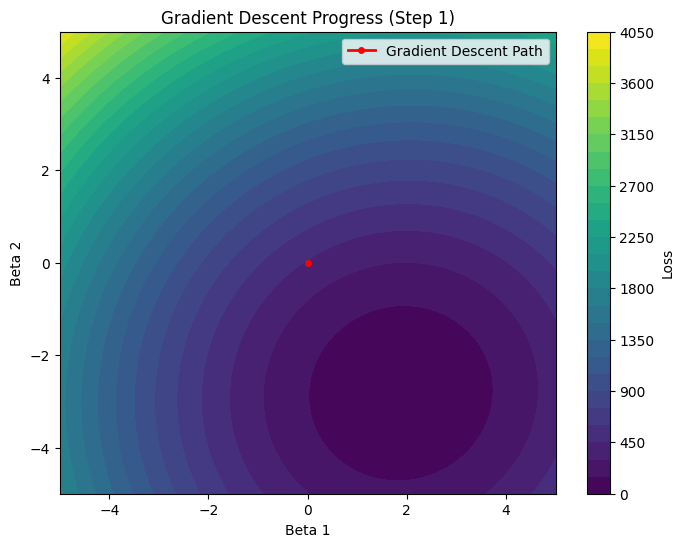

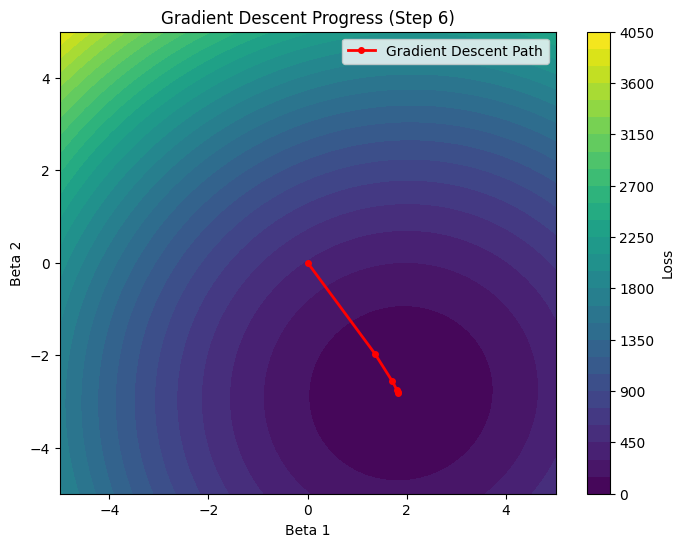

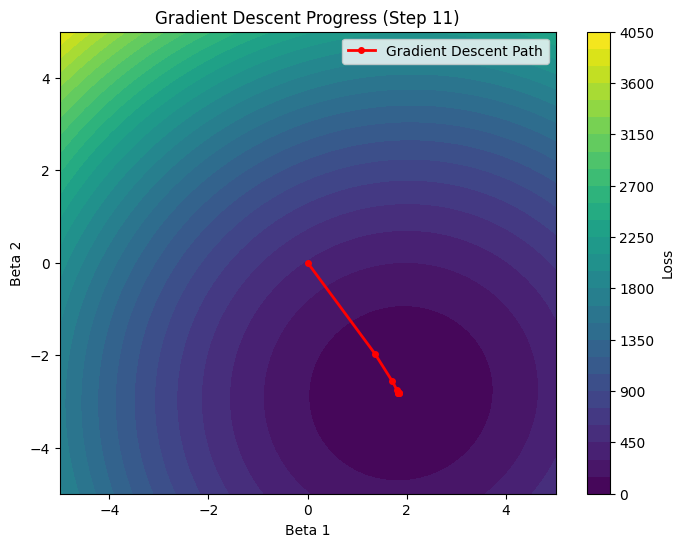

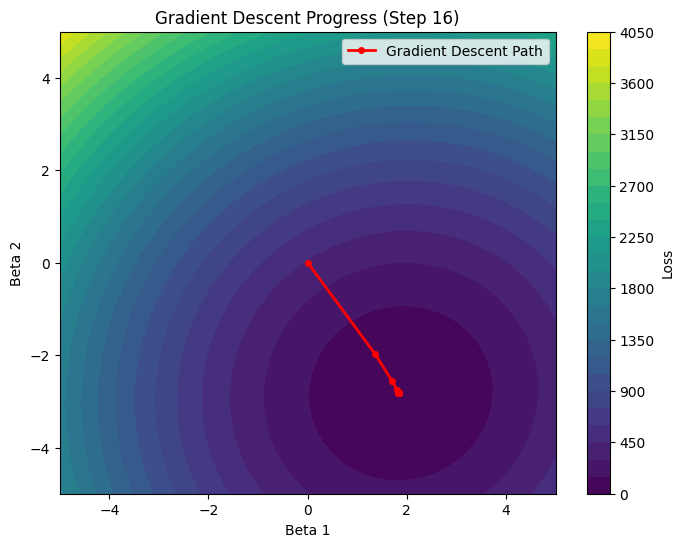

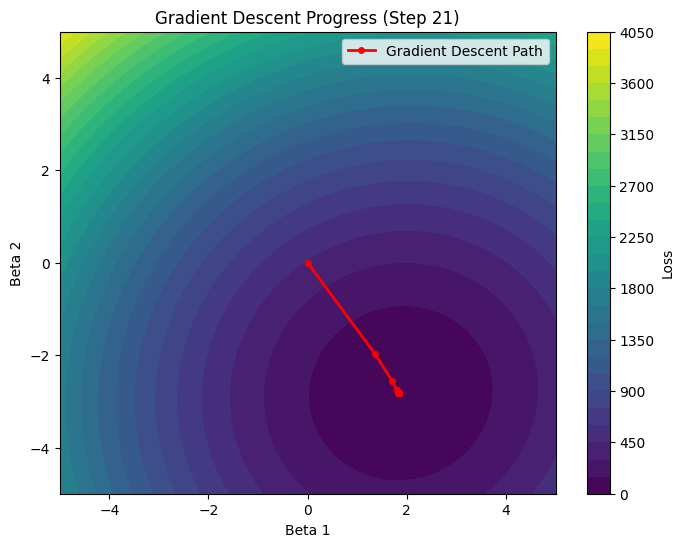

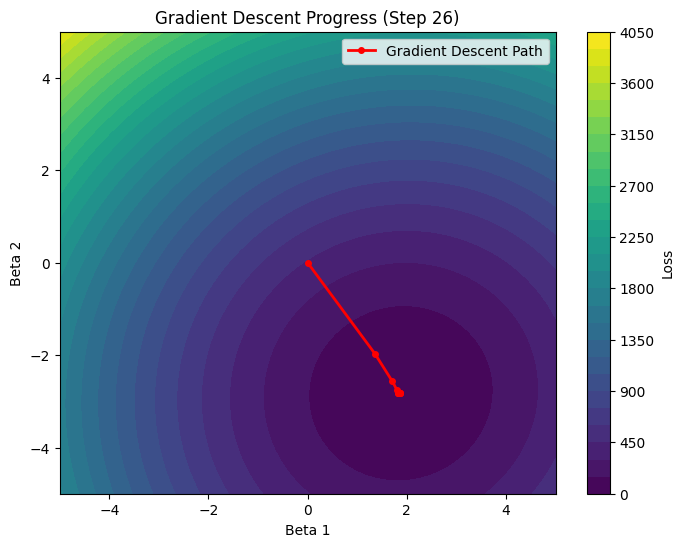

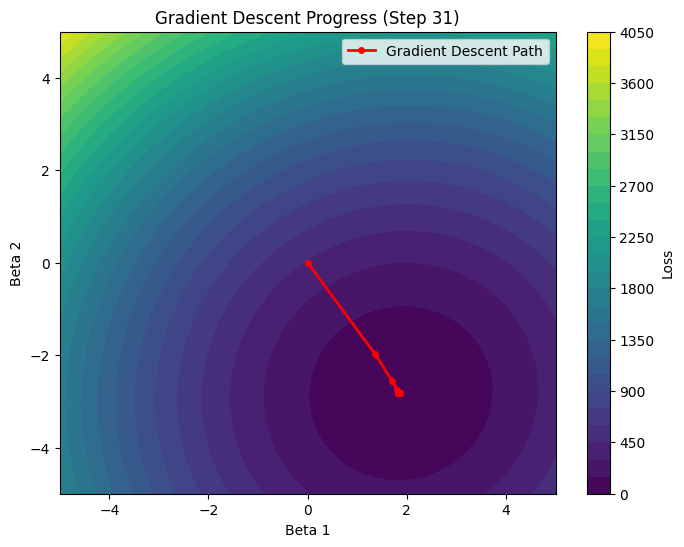

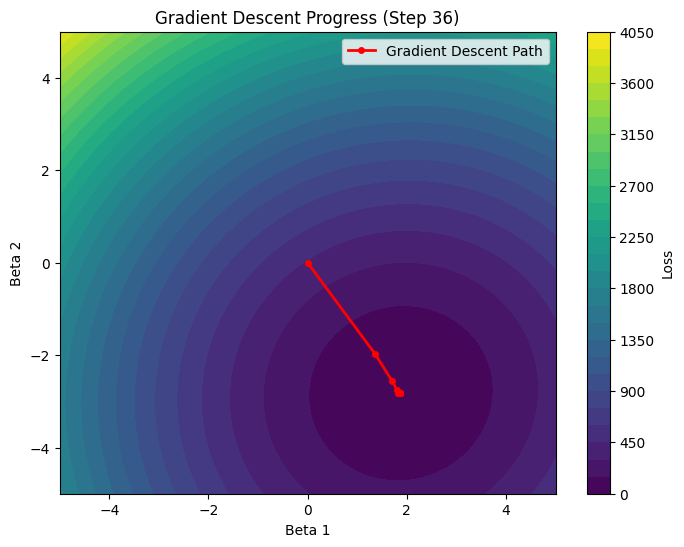

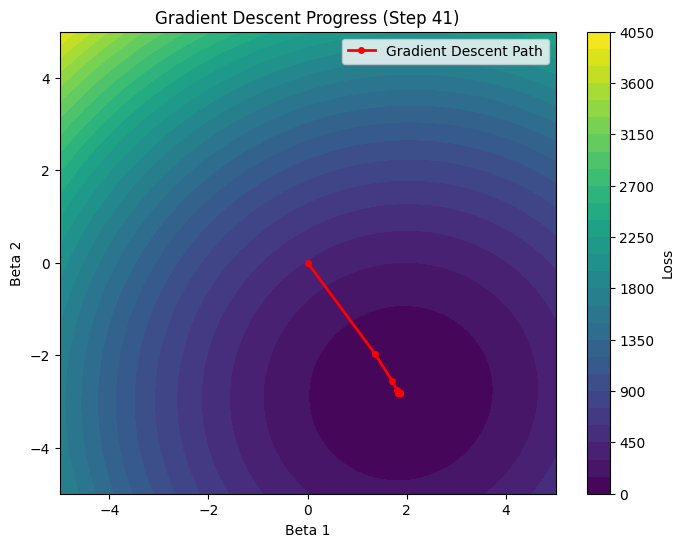

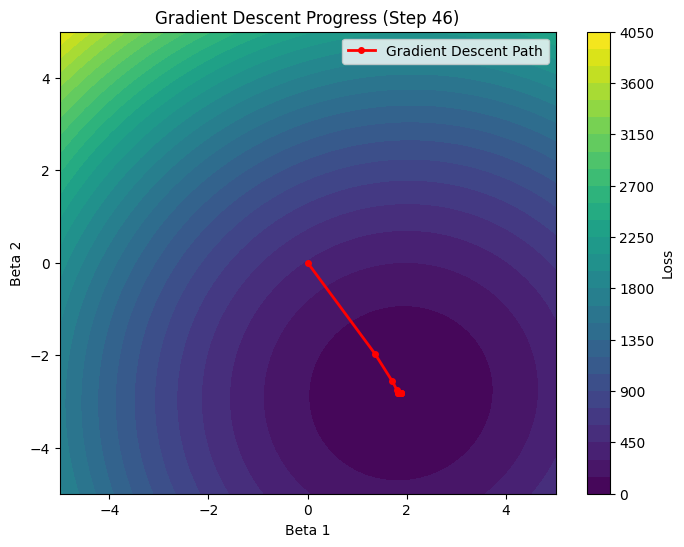

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100
x1 = np.random.uniform(-10, 10, n_samples)
x2 = np.random.uniform(-10, 10, n_samples)
true_beta0, true_beta1, true_beta2 = 5, 2, -3
epsilon = np.random.normal(0, 5, n_samples)
y = true_beta0 + true_beta1 * x1 + true_beta2 * x2 + epsilon

# Add bias term for simplicity
X = np.column_stack((np.ones(n_samples), x1, x2))

# Step 2: Define loss function and gradient
def compute_loss(beta, X, y):
    predictions = X @ beta
    return np.mean((y - predictions) ** 2)

def compute_gradient(beta, X, y):
    predictions = X @ beta
    gradient = -2 * X.T @ (y - predictions) / len(y)
    return gradient

# Step 3: Gradient descent
beta = np.array([0.0, 0.0, 0.0])  # Initialize parameters
learning_rate = 0.01
n_iterations = 50
loss_history = []
beta_history = []

for _ in range(n_iterations):
    loss = compute_loss(beta, X, y)
    loss_history.append(loss)
    beta_history.append(beta.copy())
    gradient = compute_gradient(beta, X, y)
    beta -= learning_rate * gradient

# Convert beta history to a numpy array for plotting
beta_history = np.array(beta_history)

# Step 4: Create contour plot of the loss function
beta1_range = np.linspace(-5, 5, 100)
beta2_range = np.linspace(-5, 5, 100)
beta1_grid, beta2_grid = np.meshgrid(beta1_range, beta2_range)

loss_grid = np.zeros_like(beta1_grid)
for i in range(beta1_grid.shape[0]):
    for j in range(beta1_grid.shape[1]):
        b0, b1, b2 = beta[0], beta1_grid[i, j], beta2_grid[i, j]
        loss_grid[i, j] = compute_loss(np.array([b0, b1, b2]), X, y)

# Step 5: Plot iterative updates
for i in range(1, len(beta_history), 5):  # Plot every 5th step
    plt.figure(figsize=(8, 6))
    plt.contourf(beta1_grid, beta2_grid, loss_grid, levels=30, cmap='viridis')
    plt.colorbar(label='Loss')
    plt.plot(
        beta_history[:i, 1], beta_history[:i, 2],
        color='red', marker='o', linestyle='-', linewidth=2, markersize=4, label='Gradient Descent Path'
    )
    plt.title(f'Gradient Descent Progress (Step {i})')
    plt.xlabel('Beta 1')
    plt.ylabel('Beta 2')
    plt.legend()
    plt.show()
